In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# warnings.filterwarnings("ignore")  # Disabling warnings

In [2]:
df = pd.read_csv("./h2h_assignment_dataset.csv")
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,2019.0,1.930083e+09,2019-11-01,20191031,20191101,20191116.0,USD,RV,1.0,NaN,7358.49,20191101.0,NAH4,1.930083e+09,0
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
8,U001,0200769623,WAL-MAR corp,2019-06-18 00:00:00,2019.0,1.929440e+09,2019-06-07,20190605,20190607,20190622.0,USD,RV,1.0,NaN,15995.04,20190607.0,NAH4,1.929440e+09,0
9,U001,0200762301,C&S WH systems,2019-03-06 00:00:00,2019.0,1.928819e+09,2019-02-20,20190219,20190220,20190307.0,USD,RV,1.0,NaN,28.63,20190220.0,NAC6,1.928819e+09,0


In [3]:
df.shape  # Getting the dimensions of the dataset

(50000, 19)

## Finding Count of Unique Values

In [4]:
df.nunique().sort_values(ascending=False)

doc_id                    48839
invoice_id                48833
total_open_amount         44349
name_customer              4197
cust_number                1425
due_in_date                 547
document_create_date        507
posting_date                506
document_create_date.1      506
baseline_create_date        506
clear_date                  403
cust_payment_terms           74
business_code                 6
document type                 2
invoice_currency              2
buisness_year                 2
isOpen                        2
posting_id                    1
area_business                 0
dtype: int64

## Calculating the Sum of NaN

In [5]:
df.isnull().sum().sort_values(ascending=False)

area_business             50000
clear_date                10000
invoice_id                    6
business_code                 0
invoice_currency              0
cust_payment_terms            0
baseline_create_date          0
total_open_amount             0
posting_id                    0
document type                 0
due_in_date                   0
cust_number                   0
document_create_date.1        0
document_create_date          0
posting_date                  0
doc_id                        0
buisness_year                 0
name_customer                 0
isOpen                        0
dtype: int64

# Null Value Imputation
## Filtering "clear_date" column

> This separation would be the first step towards filtering and estimating the payment date

In [6]:
clear_date_filter = df["clear_date"].notnull()
df_clear_date = df[clear_date_filter].copy()

df_clear_date.loc[0:9, ["clear_date"]]  # Printing the first 10 clear_dates

,clear_date
0,2020-02-11 00:00:00
1,2019-08-08 00:00:00
2,2019-12-30 00:00:00
4,2019-11-25 00:00:00
5,2019-12-04 00:00:00
6,2019-11-12 00:00:00
8,2019-06-18 00:00:00
9,2019-03-06 00:00:00


In [7]:
df_clear_date.nunique()

business_code                 6
cust_number                1344
name_customer              3889
clear_date                  403
buisness_year                 2
doc_id                    39158
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 491
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         35664
baseline_create_date        431
cust_payment_terms           70
invoice_id                39152
isOpen                        1
dtype: int64

 **Confirming there are no `null` in "clear_dates" column**

In [8]:
clear_date_filter.isnull().sum()  # Should print 0, representing no null values

0

## Returning the NaN clear_dates

> Tilde `~` operator is used to invert a filter in pandas. [Documentation](https://blog.finxter.com/tilde-python-pandas-dataframe/#:~:text=Python's%20Tilde%20~n%20operator%20is,1%20and%20~101%20becomes%20010%20.)


In [9]:
null_clear_dates = df[~clear_date_filter].copy()

null_clear_dates["clear_date"].head(10)  # First 10 NaN from clear_date
# null_clear_dates.head(10)  # First 10 NaN from clear_date

3     NaN
7     NaN
10    NaN
14    NaN
15    NaN
22    NaN
25    NaN
27    NaN
35    NaN
37    NaN
Name: clear_date, dtype: object

**Checking the number of unique values**

In [10]:
null_clear_dates.nunique()

business_code                6
cust_number                694
name_customer             1766
clear_date                   0
buisness_year                1
doc_id                    9681
posting_date                83
document_create_date        91
document_create_date.1      83
due_in_date                124
invoice_currency             2
document type                1
posting_id                   1
area_business                0
total_open_amount         9079
baseline_create_date        83
cust_payment_terms          43
invoice_id                9681
isOpen                       1
dtype: int64

In [11]:
data_na_test = null_clear_dates.copy()  # Setting aside the test data, will be handy at last for predicting the expected payment date.

## Schema definition for the above copied dataframe (test-dataset)

In [12]:
data_na_test.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

<h1> Preprocessing</h1>

### Dropping the "clear_data" column as it is NaN, and we need to predict that at the end

Dropping from `null_clear_dates` dataframe

In [13]:
null_clear_dates.drop(columns=["clear_date"], axis=1, inplace=True)

In [14]:
null_clear_dates.shape

(10000, 18)

## Formatting Dates

In [15]:
# dt and dts are new columns that will contain the formatted dates
# dt2 has the extra column "clear_date" that would come handy in the test data
dt = ["due_in_date",
      "document_create_date",
      "document_create_date.1",
      "baseline_create_date", ]

dt2 = dt.copy()
dt2.append("clear_date")

In [16]:
# doc -> Document creation date
# Copying two columns of null_clear_dates dataframe so to correlate them later
doc_c_dt = df_clear_date["document_create_date.1"] = df_clear_date["document_create_date.1"].astype("int")

In [17]:
doc_c_dt2 = df_clear_date["document_create_date"] = df_clear_date["document_create_date"].astype("int")

In [18]:
# Displaying the date columns that are in numeric (float) format -> integer (int) format
pd.concat([df_clear_date[dt], null_clear_dates[dt]]).dtypes

due_in_date               float64
document_create_date        int64
document_create_date.1      int64
baseline_create_date      float64
dtype: object

In [19]:
# Converting possible integer dates
for x in df_clear_date[dt]:
    df_clear_date[dt] = df_clear_date[dt].astype("int")

for x in null_clear_dates[dt]:
    null_clear_dates[dt] = null_clear_dates[dt].astype("int")

### Post Conversion of dates to Int

In [20]:
pd.concat([df_clear_date[dt], null_clear_dates[dt]]).dtypes

due_in_date               int32
document_create_date      int32
document_create_date.1    int32
baseline_create_date      int32
dtype: object

In [21]:
# Converting some to string which are in supported pandas datetime
for x in df_clear_date[dt2]:
    df_clear_date[dt2] = df_clear_date[dt2].astype("str")

for x in null_clear_dates[dt]:
    null_clear_dates[dt] = null_clear_dates[dt].astype("str")

## Conversion to Pandas Datetime

In [22]:
# converting to Datetime datatype

df_clear_date["due_in_date"] = pd.to_datetime(
    df_clear_date["due_in_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["clear_date"] = pd.to_datetime(
    df_clear_date["clear_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["document_create_date"] = pd.to_datetime(
    df_clear_date["document_create_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["document_create_date.1"] = pd.to_datetime(
    df_clear_date["document_create_date.1"], format="%Y-%m-%d"
).dt.date
df_clear_date["posting_date"] = pd.to_datetime(
    df_clear_date["posting_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["baseline_create_date"] = pd.to_datetime(
    df_clear_date["baseline_create_date"], format="%Y-%m-%d"
).dt.date

In [23]:
# converting to Datetime datatype

null_clear_dates["due_in_date"] = pd.to_datetime(
    null_clear_dates["due_in_date"], format="%Y-%m-%d"
).dt.date
# data_null['clear_date']=pd.to_datetime(data_null['clear_date'],format='%Y-%m-%d').dt.date
null_clear_dates["document_create_date"] = pd.to_datetime(
    null_clear_dates["document_create_date"], format="%Y-%m-%d"
).dt.date
null_clear_dates["document_create_date.1"] = pd.to_datetime(
    null_clear_dates["document_create_date.1"], format="%Y-%m-%d"
).dt.date
null_clear_dates["posting_date"] = pd.to_datetime(
    null_clear_dates["posting_date"], format="%Y-%m-%d"
).dt.date
null_clear_dates["baseline_create_date"] = pd.to_datetime(
    null_clear_dates["baseline_create_date"], format="%Y-%m-%d"
).dt.date

### Checking successful Pandas Datetime conversion of the date features

In [24]:
null_clear_dates

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-03-30,2020-04-10,CAD,RV,1.0,NaN,3299.70,2020-03-31,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,2020.0,1.930659e+09,2020-03-19,2020-03-18,2020-03-19,2020-04-03,USD,RV,1.0,NaN,11173.02,2020-03-19,NAA8,1.930659e+09,1
10,U001,0200418007,AM,2020.0,1.930611e+09,2020-03-11,2020-03-06,2020-03-11,2020-03-26,USD,RV,1.0,NaN,3525.59,2020-03-11,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-04-15,2020-04-30,USD,RV,1.0,NaN,121105.65,2020-04-15,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,2020.0,1.930817e+09,2020-04-23,2020-04-23,2020-04-23,2020-04-26,USD,RV,1.0,NaN,3726.06,2020-04-16,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,2020.0,1.930625e+09,2020-03-10,2020-03-09,2020-03-10,2020-03-25,USD,RV,1.0,NaN,13114.99,2020-03-10,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,2020.0,1.930851e+09,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,RV,1.0,NaN,8899.71,2020-05-03,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,4967.06,2020-03-11,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,2020.0,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,1.0,NaN,1998.64,2020-03-25,NAA8,1.930702e+09,1


In [25]:
# We have 6 null entries in "invoice_ic" feature
df_clear_date[df_clear_date["invoice_id"].isnull()].shape

(6, 19)

## Error Check

**Checking for an error with custom due_date_filter (Due date should not be less than baseline_create_date)**

In [26]:
due_date_filter = df["due_in_date"] < df["baseline_create_date"]
df[due_date_filter].shape

# Rows returned - 0 (No such error, good to go)

(0, 19)

**Checking for an error with filter (Clear date should not be less than baseline_create_date)**

In [27]:
# Checking with the other null dataset
df_clear_date[df_clear_date["clear_date"] < df_clear_date["baseline_create_date"]].shape

# This has to be an error

(2, 19)

In [28]:
df_clear_date.shape

(40000, 19)

In [29]:
null_clear_dates.shape

(10000, 18)

**Removing the error**

In [30]:
df_clear_date.drop(df_clear_date[df_clear_date["clear_date"] < df_clear_date["baseline_create_date"]].index,
                   inplace=True, index=None)  # inplace -> Modify inplace or not (boolean)

In [31]:
df_clear_date.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,1.0,NaN,22225.84,2019-09-24,CA10,2.960581e+09,0


In [32]:
df_clear_date.shape  # Earlier the shape was (40000, 19), NOW: (39998, 19)
# Removal successful 🧹

(39998, 19)

# Making the "delay" column

Formula for delay of payment date:
> clear_date - due_in_date

In [33]:
df_clear_date["delay"] = (df_clear_date["clear_date"] - df_clear_date["due_in_date"]).dt.days

In [34]:
df_clear_date["delay"].head()

0     1
1    -3
2    92
4    -3
5    61
Name: delay, dtype: int64

In [35]:
df_clear_date.describe()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,delay
count,39998.000000,3.999800e+04,39998.0,0.0,39998.000000,3.999200e+04,39998.0,39998.000000
mean,2019.132132,2.013481e+09,1.0,NaN,32061.969706,2.012358e+09,0.0,0.838442
std,0.338638,2.931565e+08,0.0,NaN,39524.195911,2.784660e+08,0.0,10.831443
min,2019.000000,1.928502e+09,1.0,NaN,0.790000,1.928502e+09,0.0,-89.000000
25%,2019.000000,1.929181e+09,1.0,NaN,4702.905000,1.929181e+09,0.0,-3.000000
50%,2019.000000,1.929733e+09,1.0,NaN,17283.500000,1.929733e+09,0.0,0.000000
75%,2019.000000,1.930209e+09,1.0,NaN,46542.090000,1.930208e+09,0.0,2.000000
max,2020.000000,9.500000e+09,1.0,NaN,668593.360000,2.960617e+09,0.0,204.000000


# Statistics

# Visualizing Delay of payment with boxplot

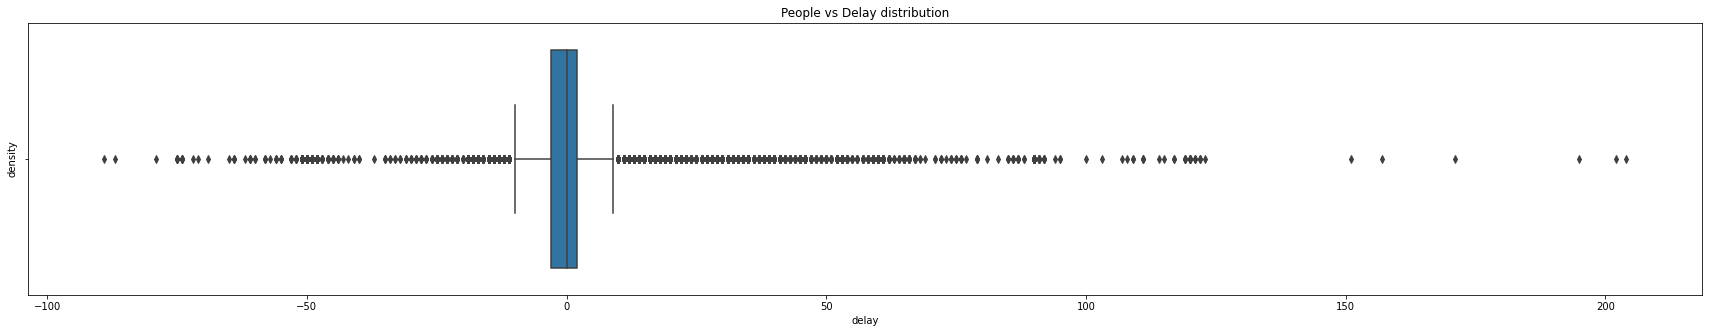

In [70]:
import seaborn as sns

fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot()
ax.set_title("People vs Delay distribution")
sns.boxplot(x=df_clear_date["delay"], )
plt.ylabel("density")
plt.show()

_The boxplot graph above is showing the density of delays, which concludes that maximum people submitted their dues with 0 delays_

Text(0, 0.5, 'density')

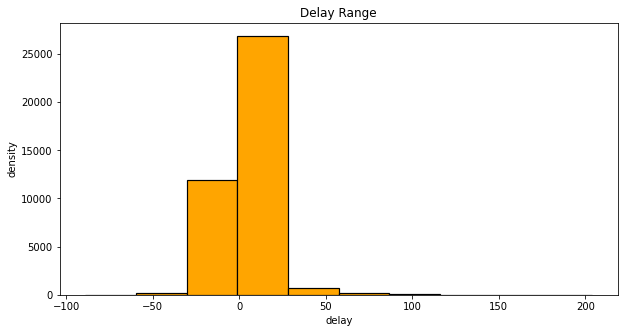

In [81]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.set_title("Delay Range")

plt.hist(df_clear_date["delay"], color='orange', edgecolor='black', linewidth=1.2)
plt.xlabel("delay")
plt.ylabel("density")

_[Calculating the Interquartile Range using the inbuilt 'percentile' in numpy](https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)_

In [98]:
# Calculating the quartiles
Q1 = np.percentile(df_clear_date["delay"], 1, method='midpoint')
Q2 = np.percentile(df_clear_date["delay"], 50, method='midpoint')
Q3 = np.percentile(df_clear_date["delay"], 99.74, method='midpoint')


**[Interquartile Range (IQR) = Q3 - Q1](https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)**

In [97]:
IQR = Q3 - Q1

In [107]:

pd.DataFrame([{"25%": Q1, "50%": Q2, "75%": Q3, "IQR": IQR}], index=['*'])

,25%,50%,75%,IQR
*,-19.0,0.0,90.0,109.0


In [105]:
# Calculating the lower, upper limits for getting the outliers -> https://towardsdatascience.com/what-is-an-outlier-26888fd9870d
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

pd.DataFrame([{"UPPER LIMIT": upper_bound, "LOWER LIMIT": lower_bound}], index=['*'])

,UPPER LIMIT,LOWER LIMIT
*,253.5,-182.5


### Calculating the outlier in delay of payments

In [108]:
outlier = []
for x in df_clear_date["delay"]:
    if (x > upper_bound) or (x < lower_bound):
        outlier.append(x)

outlier

[]

In [110]:
# Remove the outlier if any
df_clear_date.drop(df_clear_date[df_clear_date["delay"] > upper_bound].index, index=None, inplace=True)

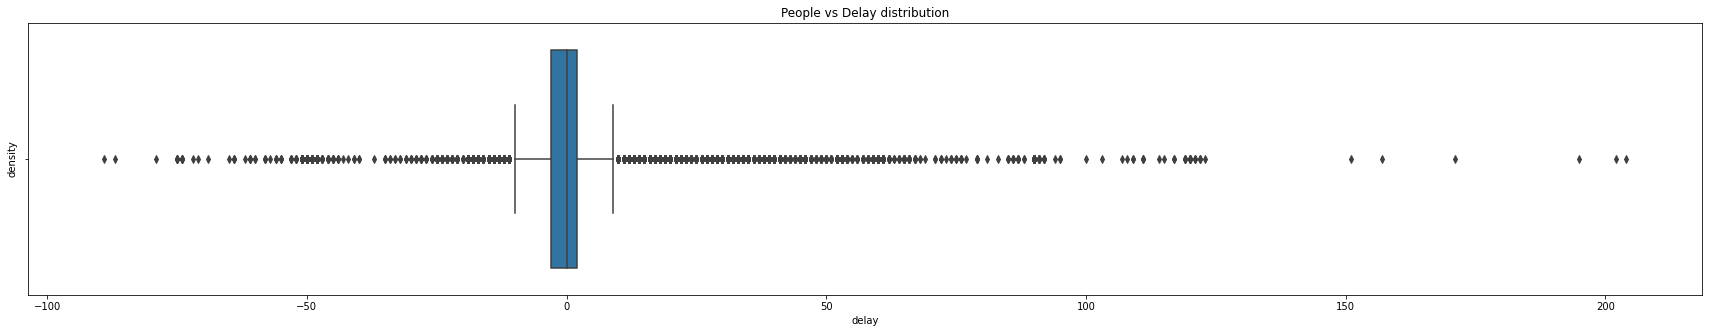

In [113]:
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot()
ax.set_title("People vs Delay distribution")
sns.boxplot(x=df_clear_date["delay"], )
plt.ylabel("density")
plt.show()